<div style="border:2px solid #422e13; border-radius:30px;  background:#ffffff;">
    <div style="padding:10px 10px 10px 0px; margin:5px; border-radius:23px; background:#1FAEE9; text-align:center;">
        <span style="font-family:sans-serif; font-size:38px; color:#fff;">Прогноз оттока клиентов</span>
    </div>
</div>

 <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9;font-family:sans-serif;color:#FFF9ED;font-size:200%;text-align:center;border-radius:15px 15px;">ПЛАН РАБОТЫ</p> 
    
    
- 1. ИЗУЧЕНИЕ ЗАДАНИЯ И ПОСТАНОВКА ЗАДАЧИ    
    
- 2. ПОЛУЧЕНИЕ ИНОФРМАЦИИ О ДАТЕСЕТЕ
    
- 3. РАЗВЕДОВАТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ. ОБРАБОТКА НАБОРА ДАННЫХ.
    
- 4. СОЗДАНИЕ МОДЕЛИ.

- 5. ПРОВЕРКА КАЧЕСТВА МОДЕЛИ.

- 6. ОБЩИЙ ВЫВОД. ОФОРМЛЕНИЕ РЕЗУЛЬТАТОВ.

 <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9;font-family:sans-serif;color:#FFF9ED;font-size:200%;text-align:center;border-radius:15px 15px;">СОДЕРЖАНИЕ</p>   
    
* [1. ЗАДАЧА](#1)
    
* [2. ИМПОРТ НЕОБХОДИМЫХ БИБЛИОТЕК](#2)
    
* [3. ЗАГРУЗКА ДАТАСЕТА](#3)
    
* [4. ПОЛУЧЕНИЕ ИНОФРМАЦИИ О ДАТЕСЕТЕ](#4)
    * [4.1  Таблица Conract](#4.1)       
    * [4.2. Таблица Personal](#4.2)    
    * [4.3. Таблица Internet](#4.3)    
    * [4.4. Таблица Phone ](#4.4) 

   
* [5. ОБЪЕДИНЕНИЕ ТАБЛИЦ](#5)
    
    
* [6. РАЗВЕДОВАТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ](#6)
    
    * [6.1. Phik](#6.1)    
    * [6.2. Корреляция](#6.2)    
    * [6.3. Целевая перменная](#6.3)    
    * [6.4. Гистограммы распределения](#6.4)
    * [6.5. Boxplot](#6.5)
    * [6.6. Типы контрактов и способы выставления счета](#6.6)
    * [6.7. Абонентская плата](#6.7)
    * [6.8. Социальное и семейное положение](#6.8)
    * [6.9. Сервисы](#6.9)
    * [6.10. Приток и отток клинтов](#6.10)   
    
    
* [7. МОДЕЛИРОВАНИЕ](#7)
    
    * [7.1.Подготовка функций](#7.1) 
    * [7.2. Подготовка данных](#7.2)
    * [7.3. Random forest Classifier ](#7.3)
    * [7.4. Catboost + Optune ](#7.4)    
    * [7.5. LGBMClassifier ](#7.5)     
    * [7.6. Вывод ](#7.6)  
    
    
* [8. ТЕСТИРОВАНИЕ МОДЕЛИ](#8)
    
    
* [9. ВЫВОД](#9) 
    
* [10. ОТЧЕТ](#10)    



<a id="1"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9 ;font-family:newtimeroman;color:#FFFFFF;font-size:200%;text-align:center;border-radius:55px 1px;">1. ЗАДАЧА</p>

<div style="border:2px solid blue; border-radius:1px; padding:1px">
    <img src="https://mentamore.com/wp-content/uploads/2020/06/internet-vazhen-dlya-cheloveka.jpg" width="100%">
</div>
<div style="padding:4px">

<div style="border-radius:10px;
            border : black solid; font-family:sans-serif;
            background-color:#1FAEE9;
            font-size:120%;
            text-align: left">

<h3 style='; border:15; border-radius: 15px; font-weight: bold; color:white'><center>Прогноз оттока</center></h3>  
    
<span style="color:#ffffff">Даны персональные данные о некоторых клиентах, информация об их тарифах и договорах.</span>    
<span style="color:#ffffff">Каждая строчка – это по клиенту.</span>    

<span style="color:#ffffff">Задача по параметрам определить уйдет клиент или нет</span> 

<a id="2"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9 ;font-family:newtimeroman;color:#FFFFFF;font-size:200%;text-align:center;border-radius:55px 1px;">2. ИМПОРТ НЕОБХОДИМЫХ БИБЛИОТЕК</p>

In [1]:
!pip install phik --q
!pip install optuna --q

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import phik

import re

import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)

import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import f1_score, roc_auc_score, roc_curve

from catboost import CatBoostClassifier
from catboost import Pool
from catboost.utils import get_roc_curve
from catboost import cv

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.utils import shuffle

from sklearn.preprocessing import (
    OneHotEncoder,
    KBinsDiscretizer,
    MinMaxScaler,
    OrdinalEncoder,
    FunctionTransformer,
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

random_state = 311022

<a id="3"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9 ;font-family:newtimeroman;color:#FFFFFF;font-size:200%;text-align:center;border-radius:55px 1px;">3. ЗАГРУЗКА ДАТАСЕТА</p>

In [3]:
try:
    contract = pd.read_csv("contract.csv")
    personal = pd.read_csv("personal.csv")
    internet = pd.read_csv("internet.csv")
    phone = pd.read_csv("phone.csv")
except:
    contract = pd.read_csv("/datasets/final_provider/contract.csv")
    personal = pd.read_csv("/datasets/final_provider/personal.csv")
    internet = pd.read_csv("/datasets/final_provider/internet.csv")
    phone = pd.read_csv("/datasets/final_provider/phone.csv")

<a id="4"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9 ;font-family:newtimeroman;color:#FFFFFF;font-size:200%;text-align:center;border-radius:55px 1px;">4. ПОЛУЧЕНИЕ ИНОФРМАЦИИ О ДАТЕСЕТЕ</p>

<a id="4.1"></a>

 <b>4.1 <span style='color:#422e13'>|</span> Таблица Conract</b>

In [4]:
contract.head(n=7).style.set_properties(
    **{
        "background-color": "#FAE7B5",
        "font-size": "14px",
        "color": "#003153",
        "border": "1.5px solid black",
    }
)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.850000,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.950000,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.850000,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.300000,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.700000,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.650000,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.100000,1949.4


Столбцы:

* BeginDate - дата заключения контракта

* EndDate - дата закрытия контракта 

* Type - тип заключения контракта

* PaperlessBilling - Выставление счетов без бумаги

* PaymentMethod - способ оплаты 

* MonthlyCharges - суммы платы в месяц

* TotalCharges - общая сумма оплаты

In [5]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [6]:
contract.duplicated().sum()

0

Пропуски в колонке EndDate заменим датой окочания датасета "2020-02-01". Такой способ упростит работу с колонкой в дальнейшем. Аномальные значения обнаружим добавив в метод аргумент errors='coerce'.

In [7]:
contract["BeginDate"] = contract["BeginDate"].astype("datetime64[M]")
contract["EndDate"] = pd.to_datetime(
    contract["EndDate"], format="%Y-%m-%d %H:%M:%S", errors="coerce"
).dt.date
contract["EndDate"] = contract["EndDate"].fillna("2020-02-01")
contract["EndDate"] = contract["EndDate"].astype("datetime64[M]")

In [8]:
contract["BeginDate"].agg(["min", "max"])

min   2013-10-01
max   2020-02-01
Name: BeginDate, dtype: datetime64[ns]

Данные по дате заключения контрактов представлены за перод с 1 октбря 2013 года по 1 февраля 2020 года

In [9]:
contract["EndDate"].agg(["min", "max"])

min   2019-10-01
max   2020-02-01
Name: EndDate, dtype: datetime64[ns]

In [10]:
contract["EndDate"].value_counts()

2020-02-01    5174
2019-11-01     485
2019-12-01     466
2020-01-01     460
2019-10-01     458
Name: EndDate, dtype: int64

У 5174 клиента договор не закончися. У остальных - 2019-10-01(458 клиентов), 2019-11-01(485 клиентов), 2019-12-01(466 клиентов), 2020-01-01(460 клиентов).

In [11]:
contract["Type"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

Три вида срока заключение договора:

    из месяца в месяц;
    на один года;
    на два года.
    
Уточни про заключение договра из месяца в месяц!

In [12]:
contract["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Больше всего выставляют счетов без бумаги

In [13]:
contract["PaymentMethod"].value_counts().sort_values(ascending=False)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [14]:
contract[contract["TotalCharges"] == " "]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,


Способ оплаты с сортировкой поспособу оплаты:

    электорнный чек - 2356 клиентов;
    чек по почте - 1612 клиентов;
    банковский перевод (автоматический платеж) - 1544 клиента
    кредитная карта (автоматический платеж) - 1522 клиенов 

In [15]:
contract[contract["TotalCharges"] == " "]["TotalCharges"].count()

11

У нас есть пропущенные значения в столбце. Так как заключили контракт месяц назад, с момента последенй записи данных в таблицу то заменим пропуски в столбце на значение из "monthly_charges".

In [16]:
contract["TotalCharges"] = pd.to_numeric(contract["TotalCharges"], errors="coerce")

In [17]:
contract.loc[contract["TotalCharges"].isna(), "TotalCharges"] = contract[
    contract["TotalCharges"].isna()
]["MonthlyCharges"]

In [18]:
contract[contract["TotalCharges"] == " "]["TotalCharges"] = contract[
    contract["TotalCharges"] == " "
]["MonthlyCharges"]

In [19]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [20]:
contract["TotalCharges"] = contract["TotalCharges"].astype("float")

In [21]:
contract.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,3062-ICYZQ,1
Type,7043,3,Month-to-month,3875
PaperlessBilling,7043,2,Yes,4171
PaymentMethod,7043,4,Electronic check,2365


In [22]:
contract.describe().T.style.background_gradient(cmap="summer")

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7043.000000,2279.798992,2266.730170,18.800000,398.550000,1394.550000,3786.600000,8684.800000


In [23]:
display(contract.loc[contract["TotalCharges"] == contract["TotalCharges"].min()])
display(contract.loc[contract["TotalCharges"] == contract["TotalCharges"].max()])

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1654,2967-MXRAV,2020-01-01,2020-02-01,One year,No,Mailed check,18.8,18.8


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4610,2889-FPWRM,2013-10-01,2019-10-01,One year,Yes,Bank transfer (automatic),117.8,8684.8


<div style="border-radius: 8px;
            border : black solid;
            background-color: #1FAEE9;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 8px; font-weight: bold; color:black'><center> Вывод по таблице contract</center></h3> 
    
● Таблица состоит из 8 столбцов, 7043 строк.  Пропущенных значений нет, дубликатов нет.    
    
● Данные по заключению контрактов представлены за период с 1 октября 2013 года по 1 февраля 2020 года.

●  У 5174 клиента договор не закончися. У остальных - 2019-10-01(458 клиентов), 2019-11-01(485 клиентов), 2019-12-01(466 клиентов), 2020-01-01(460 клиентов).

● Три способа оплаты - раз в месяц, один раз в год, один раз в два года.    
    
● Больше всего выставляют счетов без бумаги.

● Способ оплаты - электорнный чек - 2356 клиентов, чек по почте - 1612 клиентов, банковский перевод (автоматический платеж) - 1544 клиента, кредитная карта (автоматический платеж) - 1522 клиенов.
    
● Минимальная оплата в месяц - 18,25, максимальная оплата - 118, 75, средняя плата в месяц - 64,79

●  Общая плата  - минимально - 18.799999 (customerID = 2967-MXRAV - он заключил договор 1 января 2020 года, 1 февраля 2020 окнчание базы), макисмально - 8684.799805 (этот клиент с самого начала ведения базы), средняя оплата в месяц - 2283.30.

<a id="4.2"></a>
<b>4.2 <span style='color:#422e13'>|</span> Таблица Personal</b>

In [24]:
personal.head(n=7).style.set_properties(
    **{
        "background-color": "#FAE7B5",
        "font-size": "15px",
        "color": "#003153",
        "border": "1.5px solid black",
    }
)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes


Посмотрим на численные переменные 

In [25]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [26]:
personal.duplicated().sum()

0

In [27]:
personal.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,3062-ICYZQ,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933


Минимальная оплата в месяц - 18,25, максимальная оплата - 118, 75, средняя плата в месяц - 64,79

Общая плата  - минимально - 18.799999 (customerID = 2967-MXRAV - он заключил договор 1 января 2020 года, уже 1 февраля 2020 окнчание базы), макисмально - 8684.799805 (этот клиент с самого начала ведения базы), средняя оплата в месяц - 2283.30

In [28]:
personal["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [29]:
personal["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [30]:
personal["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<div style="border-radius: 8px;
            border : black solid;
            background-color: #1FAEE9;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 8px; font-weight: bold; color:black'><center> Вывод по таблице personal</center></h3>
    
● Таблица состоит из 5 столбцов, 7043 строк.  Пропущенных значений нет, дубликатов нет.      
    
● gender (пол) содержит две перменных (Male (мужской), Female(женский)), самый популярный пол - Male(мужской)
   
● Partner содержит две перменных(является ли клиент партенром(YES) или нет (NO), самое часто встречающее значение - no
    
● SeniorCitizen - указывает пожилой гражданин или нет
    
● Dependents - есть ли дети

<a id="4.3"></a>
<b>4.3 <span style='color:#422e13'>|</span> Таблица Internet</b>

In [31]:
internet.head(n=7).style.set_properties(
    **{
        "background-color": "#FAE7B5",
        "font-size": "15px",
        "color": "#003153",
        "border": "1.5px solid black",
    }
)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No


In [32]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [33]:
internet.duplicated().sum()

0

Не все клиенты пользуются интернетом, в таблице интернет содержится 5517 записей, значит часть клиентов пользуется только телефоном??

In [34]:
for i in internet.columns:
    display(i)
    display(internet[i].value_counts())
    display("_________________________________")

'customerID'

5386-THSLQ    1
7929-DMBCV    1
1530-ZTDOZ    1
0504-HHAPI    1
8887-IPQNC    1
             ..
0877-SDMBN    1
7594-RQHXR    1
2195-ZRVAX    1
0201-OAMXR    1
6050-IJRHS    1
Name: customerID, Length: 5517, dtype: int64

'_________________________________'

'InternetService'

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

'_________________________________'

'OnlineSecurity'

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

'_________________________________'

'OnlineBackup'

No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

'_________________________________'

'DeviceProtection'

No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

'_________________________________'

'TechSupport'

No     3473
Yes    2044
Name: TechSupport, dtype: int64

'_________________________________'

'StreamingTV'

No     2810
Yes    2707
Name: StreamingTV, dtype: int64

'_________________________________'

'StreamingMovies'

No     2785
Yes    2732
Name: StreamingMovies, dtype: int64

'_________________________________'

In [35]:
internet.describe(include="object").T

,count,unique,top,freq
customerID,5517,5517,5386-THSLQ,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


<div style="border-radius: 8px;
            border : black solid;
            background-color: #1FAEE9;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 8px; font-weight: bold; color:black'><center> Вывод по таблице internet </center></h3 >
    
● Таблица состоит из 8 столбцов, 5517 строк.  Пропущенных значений нет, дубликатов нет.     
    
● Cамый популярный сервис - волконно-оптическая линия
   
● Чаще всего такими интернет сервисами как 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' клиенты не пользуются

<a id="4.4"></a>
<b>4.4 <span style='color:#422e13'>|</span> Таблица Phone</b>

In [36]:
phone.head(n=7).style.set_properties(
    **{
        "background-color": "#FAE7B5",
        "font-size": "15px",
        "color": "#003153",
        "border": "1.5px solid black",
    }
)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No


In [37]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [38]:
phone["MultipleLines"].value_counts()

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

In [39]:
phone.describe(include="object").T

,count,unique,top,freq
customerID,6361,6361,4625-XMOYM,1
MultipleLines,6361,2,No,3390


<div style="border-radius: 8px;
            border : black solid;
            background-color: #1FAEE9;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 8px; font-weight: bold; color:black'><center> Вывод по таблице Phone </center></h3 >
    
● Таблица состоит из 1 столбца, 6461 строки.  Пропущенных значений нет, дубликатов нет.     
    
● Большинство клиентов не пользуются мультилинией

<a id="5"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9 ;font-family:newtimeroman;color:#FFFFFF;font-size:200%;text-align:center;border-radius:55px 1px;">5. ОБЪЕДИНЕНИЕ ТАБЛИЦ</p>

In [40]:
df = contract

In [41]:
df = df.merge(personal, how="left", on="customerID")

In [42]:
df = df.merge(internet, how="left", on="customerID")

In [43]:
df = df.merge(phone, how="left", on="customerID")

Проверим что все ОК

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

In [45]:
columns_numericla = df.select_dtypes(include="object").columns
df[columns_numericla] = df[columns_numericla].fillna("not_use")

Прверим что все ОК

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Изменим регистры названия столбцов

In [47]:
new_names = []
old_names = df.columns
for old_name in old_names:
    index_second_capital_letter = re.search(r"^([^A-Z]*[A-Z]){2}", old_name)
    if index_second_capital_letter is not None:
        new_name = (
            old_name[: (index_second_capital_letter.span()[1] - 1)]
            + "_"
            + old_name[(index_second_capital_letter.span()[1] - 1) :]
        )
        new_names.append(new_name)
    else:
        new_names.append(old_name)

In [48]:
for i in range(len(df.columns)):
    df.rename(columns={f"{old_names[i]}": f"{new_names[i].lower()}"}, inplace=True)

In [49]:
df.index.rename("customer_id", inplace=True)

Проверим что все ОК

In [50]:
df.columns

Index(['customeri_d', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

Добавим еще одну переменную - сколько месяцев абонент был клиентом фирмы

In [51]:
df["tenure"] = (((df["end_date"] - df["begin_date"]) / np.timedelta64(1, "D"))).astype(
    int
)

Добавим столбец с таргетом

In [52]:
df["target"] = 1
df.loc[df["end_date"] == "2020-02-01", "target"] = 0

In [53]:
df["target"].value_counts()

0    5174
1    1869
Name: target, dtype: int64

Проверим что все верно. Получили 5163 нулей (значит что клиент не ушел), 1869 единиц - значит что клиент ушел.

<a id="6"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9 ;font-family:newtimeroman;color:#FFFFFF;font-size:200%;text-align:center;border-radius:55px 1px;">6. Разведовательный анализ данных</p>

<a id="6.1"></a>

 <b>6.1 <span style='color:#422e13'>|</span> Phik</b>

Я поменял тип столбца **end_date** с object на data, там где было слово **No** стали пропуски (Nan), я выше заменил  эти пропуски датой окочания датасета "2020-02-01", что-бы легче было работать.

С помощью метода phik найдем взаимосвязи

Ссылка на phik https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7

In [54]:
phik_overview = df.drop(columns=["end_date", "begin_date", "customeri_d"]).phik_matrix()
phik_overview["target"].round(2).sort_values(ascending=False)

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'senior_citizen', 'tenure', 'target']


target               1.00
tenure               0.47
payment_method       0.45
monthly_charges      0.36
paperless_billing    0.30
total_charges        0.28
dependents           0.25
type                 0.25
partner              0.23
senior_citizen       0.23
online_security      0.21
tech_support         0.21
internet_service     0.20
online_backup        0.18
device_protection    0.17
streaming_tv         0.14
streaming_movies     0.14
multiple_lines       0.02
gender               0.00
Name: target, dtype: float64

Меньше всего коэффициент взаимосвязи с multiple_lines, streaming_tv, streaming_movies вообще отсутствует с gender

<a id="6.2"></a>

 <b>6.2 <span style='color:#422e13'>|</span> Корреляция</b>

<AxesSubplot:>

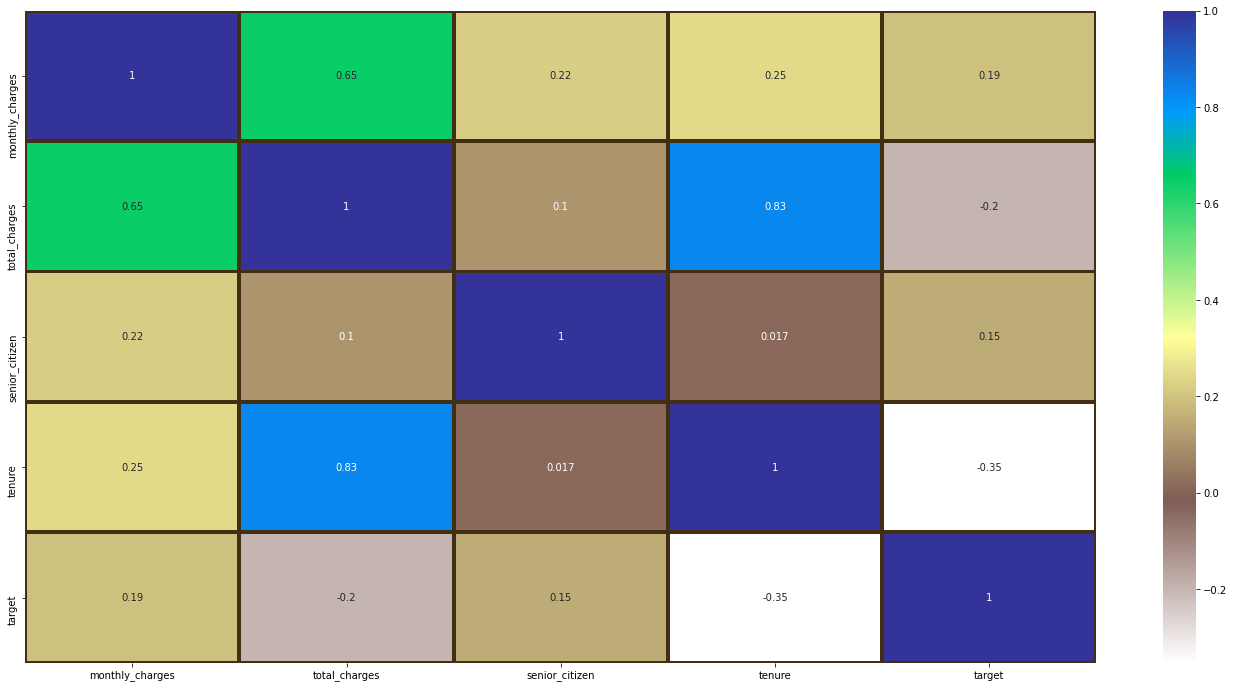

In [55]:
plt.figure(figsize=[24, 12], clear=True, facecolor="white")
sns.heatmap(
    df.corr(),
    annot=True,
    square=False,
    linewidths=3,
    linecolor="#422e13",
    cmap="terrain_r",
)

Посмотрим на таргет

<a id="6.3"></a>

 <b>6.3 <span style='color:#422e13'>|</span> Целевая переменная</b>

<AxesSubplot:ylabel='target'>

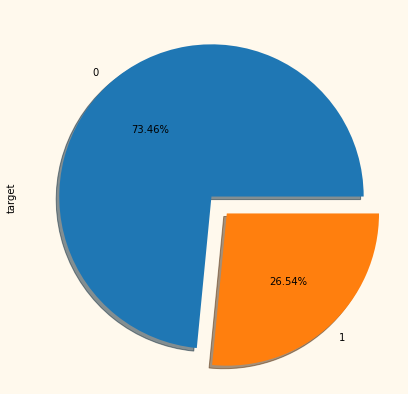

In [56]:
plt.figure(figsize=[7, 7], clear=True, facecolor="#FFF9ED")
df["target"].value_counts().plot.pie(explode=[0, 0.15], autopct="%1.2f%%", shadow=True)

Мы наблюдаем дисбаланс классов

<a id="6.4"></a>

 <b>6.4 <span style='color:#422e13'>|</span> Гистограммы распределения</b>

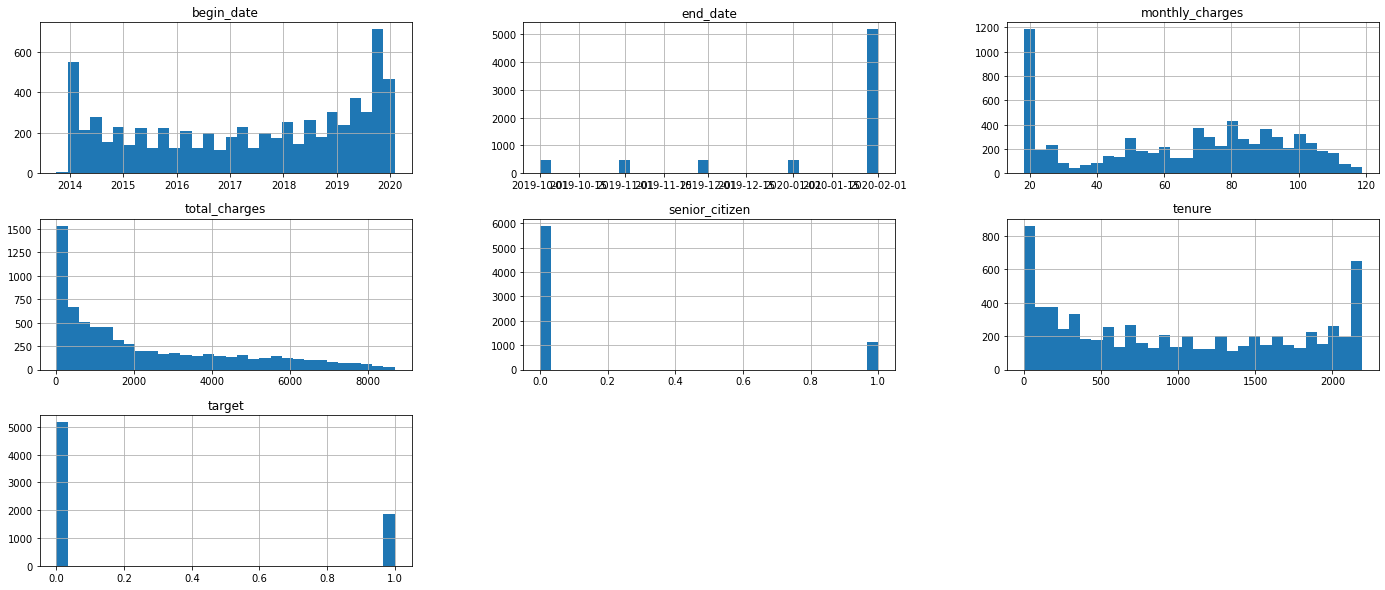

In [57]:
df.hist(figsize=(24, 10), bins=30, legend=False)
plt.show()

<a id="6.5"></a>

 <b>6.5 <span style='color:#422e13'>|</span> Boxplot</b>

<AxesSubplot:xlabel='total_charges'>

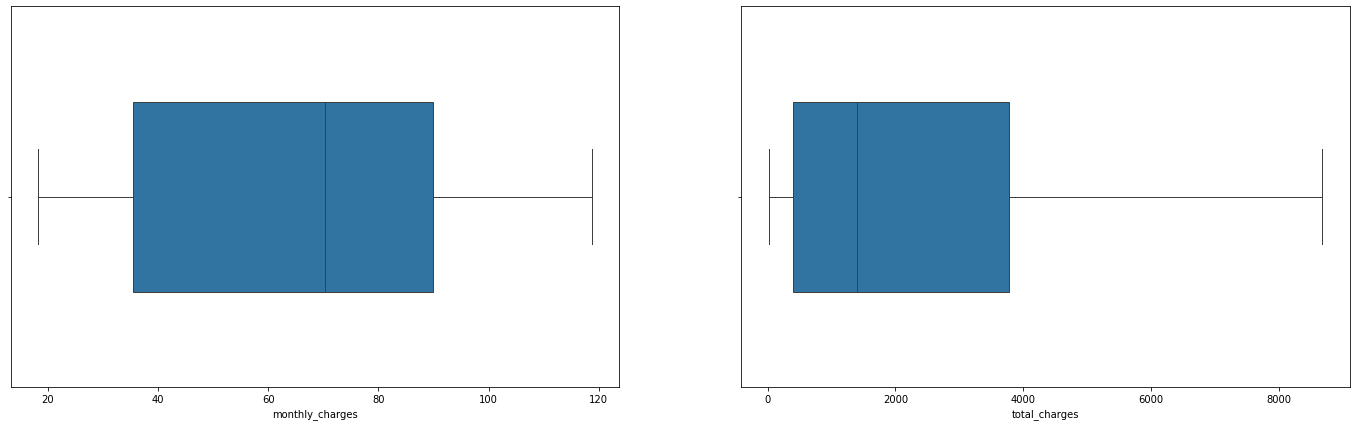

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(24, 7))

sns.boxplot(
    ax=axes[0], x="monthly_charges", data=df, width=0.5, fliersize=3, linewidth=1
)
sns.boxplot(ax=axes[1], x="total_charges", data=df, width=0.5, fliersize=3, linewidth=1)

In [59]:
df[["monthly_charges", "total_charges"]].describe().T.style.background_gradient(
    cmap="summer"
)

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
total_charges,7043.000000,2279.798992,2266.730170,18.800000,398.550000,1394.550000,3786.600000,8684.800000


Для колонки monthly_charges:

Медиана больше среднего, значит датасет имеет небольшую скошенность влево в сторону дополнительных/аномальных значений (отрицательная скошенность)

Выбросов не обнаружено

Для колонки total_charges:

Медиана меньше среднего, значит датасет имеет скошенность вправо в сторону дополнительных/аномальных значений (положительная скошенность скошенность)

Выбросов не обнаружено

Аномально высокие значения в начале гистограммы для столбца monthly_charges могут означать, что популярен какой-то начальный тариф, или на момент подключения услуги действовала бонусная/скидочная программа. А для столбца total_charges, что пользователи либо пользовались услугами недолгое время, либо ограниченным набором услуг.

<a id="6.6"></a>

 <b>6.6 <span style='color:#422e13'>|</span> Типы контрактов и способы выставления счета</b>

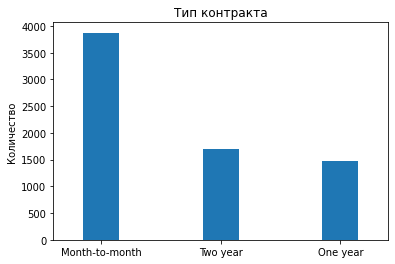

In [60]:
ax = df["type"].value_counts().plot(kind="bar", rot=0, width=0.3)
ax.set_ylabel("Количество")
ax.set_title("Тип контракта")
plt.show()

In [61]:
df.groupby("type", dropna=False)["target"].agg(["count", "mean"]).sort_values(
    by="mean", ascending=False
).style.background_gradient(low=0.12, high=1.0, cmap="YlOrRd")

,count,mean
type,,
Month-to-month,3875,0.427097
One year,1473,0.112695
Two year,1695,0.028319


Большинство клиентов заключают помесячные контракты. В то время как в контрактах на 1 год и на 2 года количество одинаково. Больше всего уходит клиентов у которых тип оплаты из месяца в месяц.

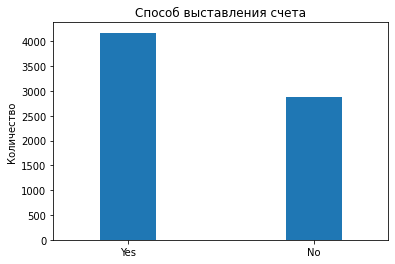

In [62]:
ax = df["paperless_billing"].value_counts().plot(kind="bar", rot=0, width=0.3)
ax.set_ylabel("Количество")
ax.set_title("Способ выставления счета")
plt.show()

In [63]:
df.groupby("paperless_billing", dropna=False)["target"].agg(
    ["count", "mean"]
).sort_values(by="mean", ascending=False).style.background_gradient(
    low=0.12, high=1.0, cmap="YlOrRd"
)

,count,mean
paperless_billing,,
Yes,4171,0.335651
No,2872,0.163301


Больше всего счетов выставляется по электронной почте. Больше всего уходит клиентов у которых счет выставляется по электронной почте.

<a id="6.7"></a>

 <b>6.7 <span style='color:#422e13'>|</span> Абонентская плата</b>

Для лучшего анализа, я разобью сет на бины, предварительно создав его копию и работая с ней, что-бы не портить основные данные.

In [64]:
df_w = df.copy()

In [65]:
df_w["monthly_charges_bin"] = pd.qcut(df_w["monthly_charges"], 8, precision=2)

In [66]:
df_w.groupby("monthly_charges_bin", dropna=False)["target"].agg(
    ["count", "mean"]
).sort_values(by="mean", ascending=False).style.background_gradient(cmap="YlOrRd")

,count,mean
monthly_charges_bin,,
"(70.35, 80.2]",879,0.389078
"(89.85, 100.2]",884,0.382353
"(80.2, 89.85]",878,0.361048
"(35.5, 55.15]",885,0.280226
"(100.2, 118.75]",874,0.274600
"(55.15, 70.35]",881,0.211124
"(20.3, 35.5]",866,0.133949
"(18.24, 20.3]",896,0.091518


<AxesSubplot:title={'center':'Колличество ушедших клиентов по сумме ежемесячного платежа'}, xlabel='monthly_charges_bin', ylabel='Процент ушедших клиентов'>

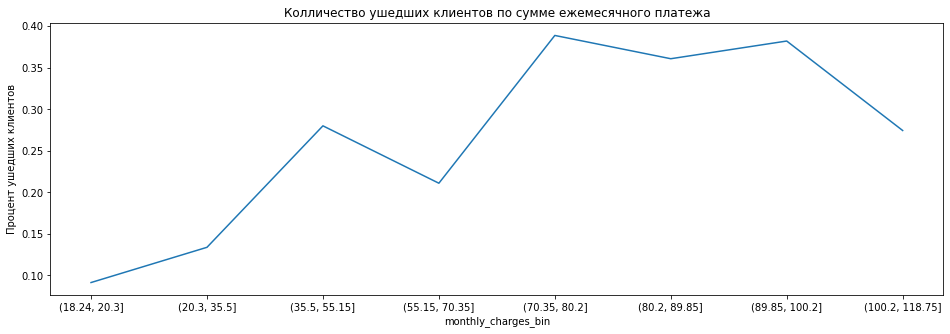

In [67]:
plt.figure(figsize=(16, 5))
plt.title("Колличество ушедших клиентов по сумме ежемесячного платежа")
plt.ylabel("Процент ушедших клиентов")
df_w.groupby("monthly_charges_bin", dropna=False)["target"].mean().plot()

Чем выше ежемесячный платеж, тем увеличивается процент ушедших людей.

In [68]:
df_w["total_charges_bin"] = pd.qcut(df_w["total_charges"], 8, precision=2)

In [69]:
df_w.groupby("total_charges_bin", dropna=False)["target"].agg(
    ["count", "mean"]
).sort_values(by="mean", ascending=False).style.background_gradient(cmap="YlOrRd")

,count,mean
total_charges_bin,,
"(18.79, 116.11]",881,0.514188
"(116.11, 398.55]",881,0.350738
"(398.55, 838.36]",879,0.271900
"(2290.22, 3786.6]",880,0.248864
"(838.36, 1394.55]",881,0.236095
"(1394.55, 2290.22]",880,0.211364
"(3786.6, 5606.38]",880,0.160227
"(5606.38, 8684.8]",881,0.129398


<AxesSubplot:title={'center':'Колличество ушедших клиентов по сумме общего платежа'}, xlabel='total_charges_bin', ylabel='Процент ушедших клиентов'>

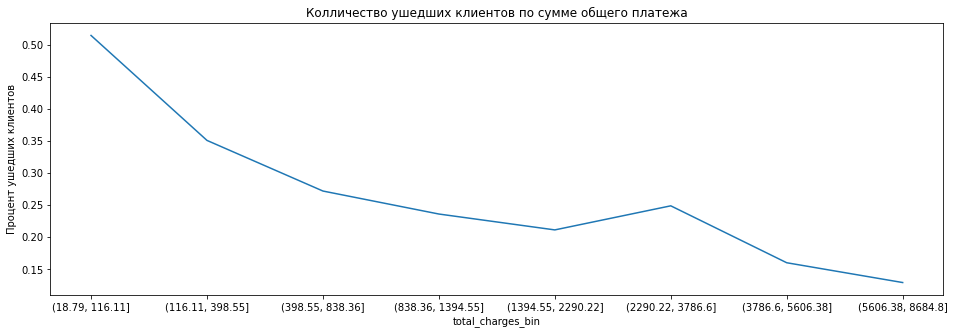

In [70]:
plt.figure(figsize=(16, 5))
plt.title("Колличество ушедших клиентов по сумме общего платежа")
plt.ylabel("Процент ушедших клиентов")
df_w.groupby("total_charges_bin", dropna=False)["target"].mean().plot()

А тут обратная зависимость, чем выше общий платеж, тем меньше процент ушедших клиентов.

<a id="6.8"></a>

 <b>6.8 <span style='color:#422e13'>|</span> Социальное и семейное положение</b>

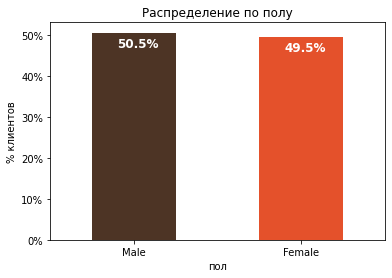

In [71]:
colors = ["#4D3425", "#E4512B"]
ax = (df["gender"].value_counts() * 100.0 / len(df)).plot(
    kind="bar", stacked=True, rot=0, color=colors
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("% клиентов")
ax.set_xlabel("пол")
ax.set_ylabel("% клиентов")
ax.set_title("Распределение по полу")

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(
        i.get_x() + 0.15,
        i.get_height() - 3.5,
        str(round((i.get_height() / total), 1)) + "%",
        fontsize=12,
        color="white",
        weight="bold",
    )

In [72]:
df.groupby("gender", dropna=False)["target"].agg(["count", "mean"]).sort_values(
    by="mean", ascending=False
).style.background_gradient(low=0.12, high=1.0, cmap="YlOrRd")

,count,mean
gender,,
Female,3488,0.269209
Male,3555,0.261603


Около половины клиентов в нашем наборе данных - мужчины, в то время как другая половина - женщины. Пол клиента не зависит от того уйдет он или нет. 

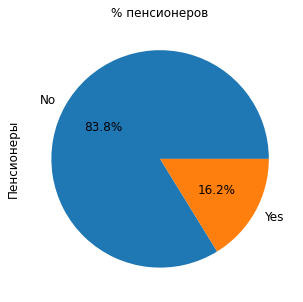

In [73]:
ax = (df["senior_citizen"].value_counts() * 100.0 / len(df)).plot.pie(
    autopct="%.1f%%", labels=["No", "Yes"], figsize=(5, 5), fontsize=12
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Пенсионеры", fontsize=12)
ax.set_title("% пенсионеров", fontsize=12)
plt.show()

In [74]:
df.groupby("senior_citizen", dropna=False)["target"].agg(["count", "mean"]).sort_values(
    by="mean", ascending=False
).style.background_gradient(low=0.12, high=1.0, cmap="YlOrRd")

,count,mean
senior_citizen,,
1,1142,0.416813
0,5901,0.236062


Только 16% клиентов являются пожилыми людьми. Таким образом, большинство наших клиентов в данных - молодые люди.
Больше клиентов уходит клиентов пенсионеров

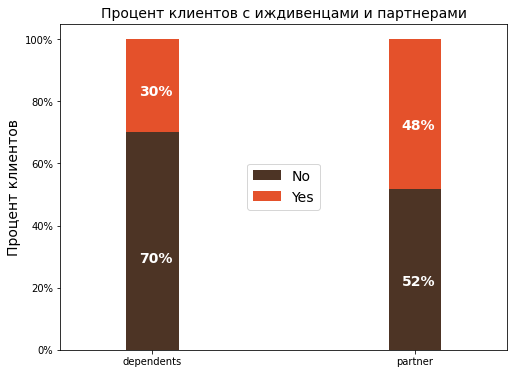

In [75]:
df2 = pd.melt(df, id_vars=["customeri_d"], value_vars=["dependents", "partner"])
df3 = df2.groupby(["variable", "value"]).count().unstack()
df3 = df3 * 100 / len(df)
colors = ["#4D3425", "#E4512B"]
ax = df3.loc[:, "customeri_d"].plot.bar(
    stacked=True, color=colors, figsize=(8, 6), rot=0, width=0.2
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Процент клиентов", size=14)
ax.set_xlabel("")
ax.set_title("Процент клиентов с иждивенцами и партнерами", size=14)
ax.legend(loc="center", prop={"size": 14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        "{:.0f}%".format(height),
        (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
        color="white",
        weight="bold",
        size=14,
    )

In [76]:
df.groupby("partner", dropna=False)["target"].agg(["count", "mean"]).sort_values(
    by="mean", ascending=False
).style.background_gradient(low=0.12, high=1.0, cmap="YlOrRd")

,count,mean
partner,,
No,3641,0.329580
Yes,3402,0.196649


In [77]:
df.groupby("dependents", dropna=False)["target"].agg(["count", "mean"]).sort_values(
    by="mean", ascending=False
).style.background_gradient(low=0.12, high=1.0, cmap="YlOrRd")

,count,mean
dependents,,
No,4933,0.312791
Yes,2110,0.154502


Около 50% клиентов имеют партнера, в то время как только у 30% от общего числа клиентов есть иждивенцы. Больше клиентов уходит клиентов не имеющих детей. Больше клиентов уходит если у него нет партнера

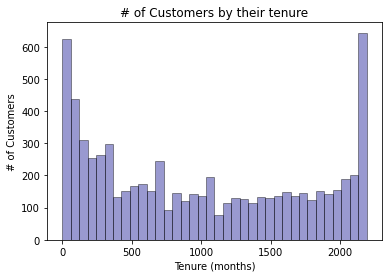

In [78]:
ax = sns.distplot(
    df["tenure"],
    hist=True,
    kde=False,
    bins=int(180 / 5),
    color="darkblue",
    hist_kws={"edgecolor": "black"},
    kde_kws={"linewidth": 4},
)
ax.set_ylabel("# of Customers")
ax.set_xlabel("Tenure (months)")
ax.set_title("# of Customers by their tenure")
plt.show()

Многие являются клиентами телекоммуникационной компании всего месяц, в то время как довольно многие являются клиентами  около 72 месяцев. Потенциально это может быть связано с тем, что у разных клиентов разные контракты.

<a id="6.9"></a>

 <b>6.9 <span style='color:#422e13'>|</span> Сервисы</b>

In [79]:
services = [
    "internet_service",
    "online_security",
    "online_backup",
    "device_protection",
    "tech_support",
    "streaming_tv",
    "streaming_movies",
    "multiple_lines",
]

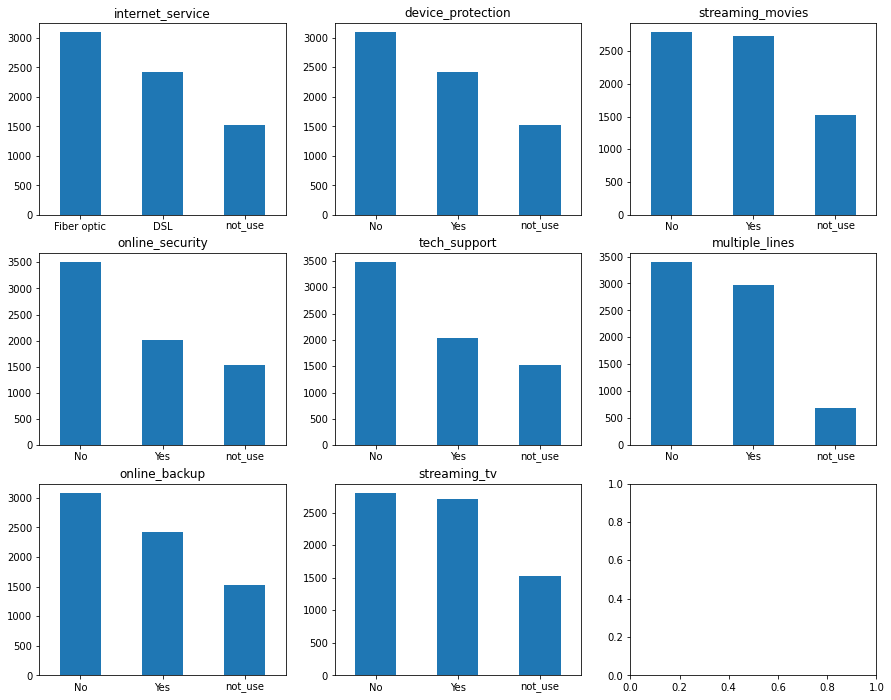

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind="bar", ax=axes[i, 0], rot=0)

    elif i >= 3 and i < 6:
        ax = df[item].value_counts().plot(kind="bar", ax=axes[i - 3, 1], rot=0)

    elif i < 9:
        ax = df[item].value_counts().plot(kind="bar", ax=axes[i - 6, 2], rot=0)
    ax.set_title(item)

In [81]:
df.groupby("internet_service", dropna=False)["target"].agg(
    ["count", "mean"]
).sort_values(by="mean", ascending=False).style.background_gradient(
    low=0.12, high=1.0, cmap="YlOrRd"
)

,count,mean
internet_service,,
Fiber optic,3096,0.418928
DSL,2421,0.189591
not_use,1526,0.074050


Больше всего клиенты пользуются волоконно-оптическую линию связи.  Больше всего уходит клиентов с  использующих волоконно-оптическую линию связи

In [82]:
df.groupby("online_security", dropna=False)["target"].agg(
    ["count", "mean"]
).sort_values(by="mean", ascending=False).style.background_gradient(
    low=0.12, high=1.0, cmap="YlOrRd"
)

,count,mean
online_security,,
No,3498,0.417667
Yes,2019,0.146112
not_use,1526,0.074050


Больше всего уходит клиентов не пользуются  онлайнзащитой, больше всего их уходит.

In [83]:
df.groupby("online_backup", dropna=False)["target"].agg(["count", "mean"]).sort_values(
    by="mean", ascending=False
).style.background_gradient(low=0.12, high=1.0, cmap="YlOrRd")

,count,mean
online_backup,,
No,3088,0.399288
Yes,2429,0.215315
not_use,1526,0.074050


Больше всего уходит клиентов не пользующихся облачным хранилищем файлов для резервного копирования данных 

In [84]:
df.groupby("device_protection", dropna=False)["target"].agg(
    ["count", "mean"]
).sort_values(by="mean", ascending=False).style.background_gradient(
    low=0.12, high=1.0, cmap="YlOrRd"
)

,count,mean
device_protection,,
No,3095,0.391276
Yes,2422,0.225021
not_use,1526,0.074050


Больше всего уходит клиентов не пользующихся антивирусом

In [85]:
df.groupby("tech_support", dropna=False)["target"].agg(["count", "mean"]).sort_values(
    by="mean", ascending=False
).style.background_gradient(low=0.12, high=1.0, cmap="YlOrRd")

,count,mean
tech_support,,
No,3473,0.416355
Yes,2044,0.151663
not_use,1526,0.074050


Больше всего уходит клиентов не пользующихся техподдержкой

In [86]:
df.groupby("streaming_tv", dropna=False)["target"].agg(["count", "mean"]).sort_values(
    by="mean", ascending=False
).style.background_gradient(low=0.12, high=1.0, cmap="YlOrRd")

,count,mean
streaming_tv,,
No,2810,0.335231
Yes,2707,0.300702
not_use,1526,0.074050


Клиеннтов у кторых подключенное стриминговое тв по ровну. Подключенная услуга стриминговое телевидение не влияет от того уйдет клиент или нет.

In [87]:
df.groupby("streaming_movies", dropna=False)["target"].agg(
    ["count", "mean"]
).sort_values(by="mean", ascending=False).style.background_gradient(
    low=0.12, high=1.0, cmap="YlOrRd"
)

,count,mean
streaming_movies,,
No,2785,0.336804
Yes,2732,0.299414
not_use,1526,0.074050


Клиеннтов у кторых подключенное стриминговые фильмы по ровну. Подключенная услуга стриминговые фильмы не влияет от того уйдет клиент или нет.

In [88]:
df.groupby("multiple_lines", dropna=False)["target"].agg(["count", "mean"]).sort_values(
    by="mean", ascending=False
).style.background_gradient(low=0.12, high=1.0, cmap="YlOrRd")

,count,mean
multiple_lines,,
Yes,2971,0.286099
No,3390,0.250442
not_use,682,0.249267


Подключенная услуга мультилиния не влияет от того уйдет клиент или нет.

<a id="6.10"></a>

 <b>6.10 <span style='color:#422e13'>|</span>  Приток и отток клиентов</b>

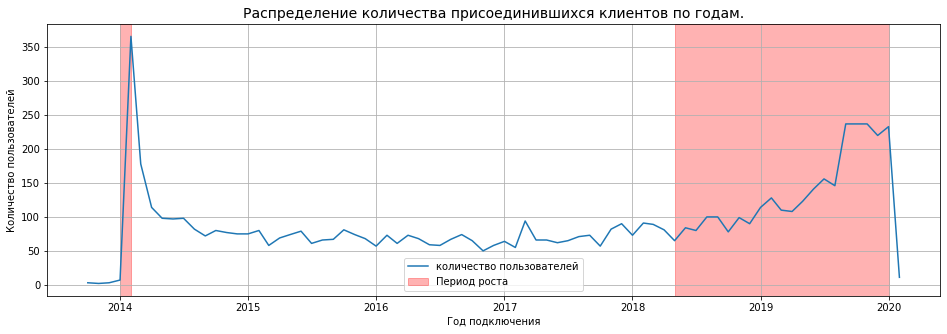

In [89]:
plt.figure(figsize=(16, 5))
plt.title("Распределение количества присоединившихся клиентов по годам.", fontsize=14)
plt.ylabel("Количество пользователей")
plt.xlabel("Год подключения")
plt.plot(
    df.join(df.index.to_frame()).groupby("begin_date")["customer_id"].count(),
    "-",
    label="количество пользователей",
    alpha=1,
)
plt.axvspan("2014-01-01", "2014-02-01", color="red", label="Период роста", alpha=0.3)
plt.axvspan("2018-05-01", "2020-01-01", color="red", alpha=0.3)
plt.grid(True)
plt.legend()

Активнее всего клиенты присоединялись в период с января 2014 по февраль 2014 и в период с мая 2018 по сентябрь 2019.

Резкий спад показателей в 2020 году обусловлен ограниченностью набора по временным рамкам, т.е. данные обрываются (датасет актуаден на 1 февраля 2020 года).

Рассмотрим распределение количества ушедших клиентов по годам

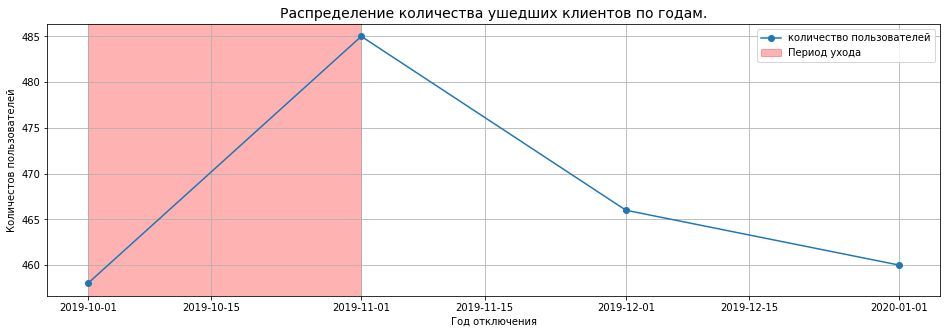

In [90]:
plt.figure(figsize=(16, 5))
plt.title("Распределение количества ушедших клиентов по годам.", fontsize=14)
plt.ylabel("Количестов пользователей")
plt.xlabel("Год отключения")
plt.plot(
    df[df["end_date"] != "2020-02-01"]
    .join(df.index.to_frame())
    .groupby("end_date")["customer_id"]
    .count(),
    "o-",
    label="количество пользователей",
    alpha=1,
)
plt.axvspan(
    "2019-10-01 00:00:00",
    "2019-11-01 00:00:00",
    color="red",
    label="Период ухода",
    alpha=0.3,
)
plt.grid(True)
plt.legend()

В период с октярбря 2019 года по ноябрь 2019 наблюдается рост оттока клиентов.

<div style="border-radius: 8px;
            border : black solid;
            background-color: #1FAEE9;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 8px; font-weight: bold; color:black'><center> Вывод по разведовательному анализу данных </center></h3 >
    
● Большинство клиентов заключают помесячные контракты. В то время как в контрактах на 1 год и на 2 года количество одинаково. Больше всего уходит клиентов у которых тип оплаты из месяца в месяц.    
    
● Больше всего счетов выставляется по электронной почте. Больше всего уходит клиентов у которых счет выставляется по электронной почте.
    
●  Чем выше ежемесячный платеж, тем больший процент клиентов уходит.   
    
●  Чем выше общий платеж, тем меньше процент ушедших клиентов.
    
●  Около половины клиентов в нашем наборе данных - мужчины, в то время как другая половина - женщины. Пол клиента не зависит от того уйдет он или нет.
    
●  Только 16% клиентов являются пожилыми людьми. Таким образом, большинство наших клиентов в данных - молодые люди. Больше уходит клиентов являющиеся пенсионерами.
    
● Около 50% клиентов имеют партнера, в то время как только у 30% от общего числа клиентов есть дети. Большинство уходящий клиентов не имеют детей или у них нет партнера.
    
● Многие являются клиентами телекоммуникационной компании всего месяц, в то время как довольно многие являются клиентами около 72 месяцев. Потенциально это может быть связано с тем, что у разных клиентов разные контракты.
    
● Большинство всех клиентов, а так-же уходящих клиентов используют волоконно-оптическую линию связи.
    
● Болшинство всех клиентов, уходящих клиентов не использует такие сервисы как 'internet_service','online_security','online_backup','device_protection','tech_support'. 
    
● Только половина клиентов использует такие сервисы как 'streaming_tv','streaming_movies','multiple_lines'.  Подключение данной услуги не влияет от того уйдет клиент или нет.  
    
●    Активнее всего клиенты присоединялись в период с января 2014 по февраль 2014 и в период с мая 2018 по сентябрь 2019.
    
●   В период с октярбря 2019 года по ноябрь 2019 наблюдается рост оттока клиентов.

<a id="7"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9 ;font-family:newtimeroman;color:#FFFFFF;font-size:200%;text-align:center;border-radius:55px 1px;">7. МОДЕЛИРОВАНИЕ</p>

<a id="7.1"></a>

 <b>7.1 <span style='color:#422e13'>|</span> Подготовка функций</b>

In [91]:
def predict(model, features_validate, target_validate):
    probabilities = model.predict_proba(features_validate)[:, 1]
    score = model.predict(features_validate)
    fpr, tpr, thr = roc_curve(target_validate, probabilities)
    auc_roc = roc_auc_score(target_validate, probabilities)
    f1 = f1_score(target_validate, score)
    return fpr, tpr, thr, auc_roc, f1

In [92]:
def result_metrics(auc_roc, model_name, df_result):
    df_result.loc[model_name, "auc_roc"] = auc_roc
    return df_result

In [93]:
df_result = pd.DataFrame(columns=["auc_roc"])
df_result

,auc_roc


<a id="7.2"></a>

 <b>7.2 <span style='color:#422e13'>|</span> Подготовка данных</b>

<div style="border-radius: 8px;
            border : black solid;
            background-color: #1FAEE9;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 8px; font-weight: bold; color:black'><center> Оптимизация перменных </center></h3 >
    
● Столбцы paperless_billing и payment_method коррелируют друг, и следуя логики не могут повлиять, уйдет ли клиент или нет.    
    
● Данные из столбца monthly_charges уже включены в столбец total_charges. Поэтому столбец monthly_charges. Можно убрать.
    
●  customer_id это уникальный номер клиента, и он не може отказывать влияние на то уйдет клиент или нет.
       
    
●  Пол клиента не зависит от того уйдет клиент или нет.
           
●  begin_date, end_date  удалим, вместо них добавим дополнительную фичу tenure, срок (в днях) сколько абонент был клиентом фирмы.


In [94]:
df_model = df.drop(
    [
        "begin_date",
        "end_date",
        "customeri_d",
        "paperless_billing",
        "payment_method",
        "monthly_charges",
        "gender",
    ],
    axis=1,
)

In [95]:
target = ["target"]

features = [
    "type",
    "total_charges",
    "senior_citizen",
    "partner",
    "dependents",
    "internet_service",
    "online_security",
    "online_backup",
    "device_protection",
    "tech_support",
    "streaming_tv",
    "streaming_movies",
    "multiple_lines",
    "tenure",
]

cat_features = [
    "type",
    "senior_citizen",
    "partner",
    "dependents",
    "internet_service",
    "online_security",
    "online_backup",
    "device_protection",
    "tech_support",
    "streaming_tv",
    "streaming_movies",
    "multiple_lines",
]

num = ["total_charges", "tenure"]

In [96]:
train, test = train_test_split(
    df_model, train_size=0.8, random_state=random_state, stratify=df["target"]
)

Сделаем Pipeline

In [97]:
num_transformer = Pipeline(
    steps=[
        ("discritiser", KBinsDiscretizer(encode="ordinal", strategy="uniform")),
        ("scaler", MinMaxScaler()),
    ]
)

cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[("num", num_transformer, num), ("cat", cat_transformer, cat_features)]
)

<a id="7.3"></a>

 <b>7.3 <span style='color:#422e13'>|</span> Random forest regressor</b>

In [98]:
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classiffier",
            RandomForestClassifier(random_state=random_state, class_weight="balanced"),
        ),
    ]
)

In [99]:
param_grid = {
    "classiffier__max_depth": range(1, 8, 1),
    "classiffier__n_estimators": range(40, 60, 10),
}

In [100]:
grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring='roc_auc', cv=5)

In [101]:
%%time
grid_RF = grid_search.fit(train[features], train[target].values.ravel())

CPU times: user 9.96 s, sys: 41.2 ms, total: 10 s
Wall time: 10 s


In [102]:
grid_RF.best_score_

0.8376285253848497

In [103]:
result_metrics(grid_RF.best_score_, "Random forest Classifier", df_result)

,auc_roc
Random forest Classifier,0.837629


Random forest regressor показал результат не удовлетворяющих условию. Исследуем следующую модель.

<a id="7.4"></a>

 <b>7.4 <span style='color:#422e13'>|</span> Catboost +  Optune</b>

In [104]:
train_data = Pool(data=train[features], label=train[target], cat_features=cat_features)

test_data = Pool(data=test[features], label=test[target], cat_features=cat_features)

In [105]:
def objective(trial):
    global train_data

    param = {
        "n_estimators": trial.suggest_int("n_estimators", 400, 500),
        "max_depth": trial.suggest_int("max_depth", 2, 4),
        #"subsample": trial.suggest_float("subsample", 0.5, 1.0),
        #"l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 2.5, 4),
        #"random_strength": trial.suggest_float("random_strength", 0.9, 1.4),
        #"learning_rate": trial.suggest_float("eta", 1e-2, 1e-1, log=True),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 3, 5),
        "grow_policy": trial.suggest_categorical("grow_policy", ["Lossguide"]),
        "random_state": trial.suggest_categorical("random_state", [random_state]),
        "eval_metric": trial.suggest_categorical("eval_metric", ["AUC"]),
        "loss_function": trial.suggest_categorical("loss_function", ["Logloss"]),
        "auto_class_weights": trial.suggest_categorical(
            "auto_class_weights", ["Balanced"]
        ),
        "silent": trial.suggest_categorical("silent", [True]),
        #'logging_level': trial.suggest_categorical('logging_level', ['Silent']),
    }

    scores = cv(train_data, param, fold_count=4)

    return scores['test-AUC-mean'].values[-1]

In [121]:
%%time
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5, timeout=600)

if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=1e6, timeout=60*1)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

Training on fold [0/4]

bestTest = 0.9059430623
bestIteration = 494

Training on fold [1/4]

bestTest = 0.8732219897
bestIteration = 489

Training on fold [2/4]

bestTest = 0.8816683459
bestIteration = 494

Training on fold [3/4]

bestTest = 0.8924476641
bestIteration = 495

Training on fold [0/4]

bestTest = 0.8913017644
bestIteration = 436

Training on fold [1/4]

bestTest = 0.8576080498
bestIteration = 411

Training on fold [2/4]

bestTest = 0.8672440518
bestIteration = 437

Training on fold [3/4]

bestTest = 0.8812908043
bestIteration = 439

Training on fold [0/4]

bestTest = 0.8913637655
bestIteration = 448

Training on fold [1/4]

bestTest = 0.8579774729
bestIteration = 448

Training on fold [2/4]

bestTest = 0.8672983027
bestIteration = 445

Training on fold [3/4]

bestTest = 0.8814411873
bestIteration = 449

Training on fold [0/4]

bestTest = 0.8923131571
bestIteration = 451

Training on fold [1/4]

bestTest = 0.8562659847
bestIteration = 438

Training on fold [2/4]

bestTest =

In [107]:
result_metrics(trial.value, "Catboost", df_result)

,auc_roc
Random forest Classifier,0.837629
Catboost,0.887789


Catboost показал результат соответсвующий требуемому условию.

<a id="7.5"></a>

 <b>7.5 <span style='color:#422e13'>|</span> Lightgbm</b>

In [108]:
for c in cat_features:
    df_model[c] = df_model[c].astype("category")

In [109]:
train, test = train_test_split(
    df_model, train_size=0.8, random_state=random_state, stratify=df["target"]
)

In [110]:
param_grid = {
    "max_depth": [5, 10, 15, 20],
    "learning_rate": [0.1, 0.2],
    "n_jobs": [1, -1],
}

In [111]:
lgb_estimator = LGBMClassifier(
    boosting_type="gbdt",
    metric="auc",
    random_state=random_state,
    class_weight="balanced",
)

In [112]:
grid_search = GridSearchCV(lgb_estimator, param_grid=param_grid, cv=5)

In [113]:
%%time
lgb_model = grid_search.fit(X=train[features], y=train[target].values.ravel())

CPU times: user 9.74 s, sys: 296 ms, total: 10 s
Wall time: 10.1 s


In [114]:
result_metrics(lgb_model.best_score_, "LGBMClassifier", df_result)

,auc_roc
Random forest Classifier,0.837629
Catboost,0.887789
LGBMClassifier,0.839725


<a id="7.6"></a>

 <b>7.6 <span style='color:#422e13'>|</span> Вывод</b>

In [115]:
df_result.sort_values(by="auc_roc", ascending=False)

,auc_roc
Catboost,0.887789
LGBMClassifier,0.839725
Random forest Classifier,0.837629


<div style="border-radius: 8px;
            border : black solid;
            background-color: #1FAEE9;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 8px; font-weight: bold; color:black'><center> Выбор лучшей модели </center></h3 >
    
● По показателю AUC-ROC лучшей моделью оказался CatBoostClassifier с AUC-ROC равным 0.89.    


<a id="8"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9 ;font-family:newtimeroman;color:#FFFFFF;font-size:200%;text-align:center;border-radius:55px 1px;">8. ТЕСТИРОВАНИЕ МОДЕЛИ</p>

С помощью метода **optuna** найдем оптимальные показатели.

Передадим оптимальные показатели модели

In [123]:
params = {
    "n_estimators": 460,
    "max_depth": 4,
    "subsample": 0.6953531524588152,
    "l2_leaf_reg": 3.6276487575661394,
    "random_strength": 1.2744769725503318,
    "eta": 0.09757718100576142,
    "min_data_in_leaf": 5,
    "grow_policy": "Lossguide",
    "random_state": 311022,
    "eval_metric": "AUC",
    "loss_function": "Logloss",
    "auto_class_weights": "Balanced",
    "silent": True,
}

In [124]:
model = CatBoostClassifier(**params)

In [127]:
model.fit(train_data, eval_set=test_data)

Высчитаем AUC-ROC

In [119]:
probabilities = model.predict_proba(test_data)[:, 1]
auc_roc = roc_auc_score(test["target"], probabilities)
print(auc_roc)

0.9209369913973495


AUC-ROC равен 0.92. Что соответсвует требованиям.

<a id="9"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9 ;font-family:newtimeroman;color:#FFFFFF;font-size:200%;text-align:center;border-radius:55px 1px;">9. ВЫВОД</p>

<div style="border-radius: 8px; border : black solid; background-color: #1FAEE9; font-size:100%; text-align: left">

<h3 style='; border:0; border-radius: 8px; font-weight: bold; color:black'><center> В ходе работы выполнено: </center></h3 >

● Изучено задание, проведен первичный анализ данных.

    Проанализированны таблицы contract.csv", "personal.csv", "internet.csv", "phone.csv". Таблицы содержали разное колличество записей ("CONRACT" - 7043, "PERSONAL" - 7043, "PHONE" - 6361, "INTERNET" - 5517). Это обусловлено тем что не все клиенты пользуются услугами INTERNET или PHONE, как следствие данных по ним в таблицах нет.

● Проведена предобработка данных:

    данные проверены на наличие дубликатов и пропущенных значений. Дубликатов нет. Были обнаружены пропущенные значения в таблице contract.csv"в столбце TotalCharges. Это было вызвано тем что клиенты заключили контракт месяц назад и общий платеж еще не был внесен в базу.

    тип данных в столбцах EndDate, begin_date изменен на date. Так как в столбце EndDate содержались и текстовые переменные No (контракт не разорван), они стали пропущенными значениями, заменил их на дату окончания базы.

    все датасеты объединены в один датасет для удобства работы. Так как количество записей в таблицах разное, то при объединении получены пропущенные значения, которые были заменены фразой not_use не используется.

● Проведен исследовательский анализ данных:

    с помощью метода phik выявлены взаимосвязи, удалены столбцы 'begin_date', 'end_date', 'customeri_d', 'paperless_billing', 'payment_method', 'monthly_charges','gender' негативно влияющие на качество модели. Добавлен новый признак - tenure - разница в днях между датой заключения контракта и датой прекращения действия договора. И целевой признак target - расторгнут контракт(значение 1) или нет (значение 0).

● Проведено моделирование:

    построена модель Random forest regressor. При построении модели с использованием Pipeline и методом OneHotEncoder закодированы категориальные переменные, методом MinMaxScaler масштабированы числовые признаки. Учтен дисбаланс классов. Методом GridSearch подобраны оптимальные параметры модели.

    построена модель Catboost. При построении модели подобраны с помощью optune оптимальные параметры. Учтен дисбаланс классов.

    построена модель LightGBM. Учтен дисбаланс классов. Методом GridSearch подобраны оптимальные параметры модели.

    лучшая модель по показатель AUC-ROC - Catboost. AUC-ROC равен 0.90.

● Проведено тестирование модели:

    модель переобучена на тренировочной и валидационной выборке.

    optune подобраны оптимальные параметры.

    оптимальные параметры = {
    'n_estimators': 460,
    'max_depth': 4,
    'subsample': 0.6953531524588152,
    'l2_leaf_reg': 3.6276487575661394,
    'random_strength': 1.2744769725503318,
    'eta': 0.09757718100576142,
    'min_data_in_leaf': 5,
    'grow_policy': 'Lossguide',
    'random_state': 311022,
    'eval_metric': 'AUC',
    'loss_function': 'Logloss',
    'auto_class_weights': 'Balanced',
    'silent': True}

    на тестовой выборке AUC-ROC равен 0.92. Что соответствует условию задачи.

<a id="10"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1FAEE9 ;font-family:newtimeroman;color:#FFFFFF;font-size:200%;text-align:center;border-radius:55px 1px;">10. ОТЧЕТ</p>

<div style="border-radius: 8px; border : black solid; background-color: #1FAEE9; font-size:100%; text-align: left"
    
1. Все намечанные шаги были выполнены.

2. Наибольшее затруднение вызвал шаг: "Исследовательский анализ данных." На данном шаге так же необходимо правильно выявить закономерности взаимовляния факторов. Отделить негативно влияющие на итоговое качество модели факторы, так и малозначимые.

   *Для решения использовал:*

      *методом phick выявил зависимтости*

      *построение гистограм для оценки распределения, выявления тенденций, аномалий и выбросов

      *группировка данных по определенному признаку( например, по году подключения или типу оплаты) и визуализация*

      *круговую диаграмму для оценки баланса классов в целевом признаке*

      *построение визуализации по сгруппированным данным*

      *удаление негативных/малозначимых признаков, добавление новых*

3. Все шаги плана являются важными, отдельно с моей точки зрения стоит выделить :

    "Изучение исходных данных и постановка задачи" - Уточнение запроса и формирование образа конечного результата, определение ключевой метрики для оценки качества будущей модели.
 
    "Предобработку данных и разведовательный анализ данных" - На данном этапе важно правильно обработать данные, установить закономерности. Без качетсвенного анализа данных не возможно построить эффективную модель.

4. Итоговой моделью выбран CatBoostClassifier  AUC-ROC равен 0.92

    оптимальные параметры = {
    
    'n_estimators': 460,
     
    'max_depth': 4,

    'subsample': 0.6953531524588152,

    'l2_leaf_reg': 3.6276487575661394,

    'random_strength': 1.2744769725503318,

    'eta': 0.09757718100576142,

    'min_data_in_leaf': 5,

    'grow_policy': 'Lossguide',

    'random_state': 311022,

    'eval_metric': 'AUC',

    'loss_function': 'Logloss',

    'auto_class_weights': 'Balanced',

    'silent': True}
 



При построении модели  был сформированы следующие признаки:

    целевой признак - столбец  target таблицы df. Формирование целевого признака происходило следующим образом, если в столбце "EndDate" таблицы contract.csv была дата окончания контракта то столбец target сгруппированной таблицы df принимал значение равное 1, если  в столбце "EndDate" таблицы contract.csv было значение No (контракт не разорван) то столбец target принимал значение равное 0.

    Выбраны следующие признаки  для обучения модели - "type", "total_charges","senior_citizen", "partner","dependents", "internet_service", "online_security", "online_backup", "device_protection" "tech_support", "streaming_tv", "streaming_movies", "multiple_lines", "tenure". Которые были определены как оптимальные в ходе разведывательного анализа данных. Исключены такие признаки как begin_date', 'end_date', 'customeri_d', 'paperless_billing', 'payment_method', 'monthly_charges','gender' негативно влияющие на качество модели.

    Добавлен еще одни признак повышающий качество модели - tenure. Этот признак показывает разницу  в днях между датой заключения контракта и датой прекращения действия договора.

    Дополнительно были определены категориальные признаки которые закладывались в модель. А именно столбцы "type","senior_citizen", "partner", "dependents", "internet_service", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies", "multiple_lines".


Подготовка признаков:

    данные проверены на наличие дубликатов и пропущенных значений. Дубликатов нет. В таблице contract.csv"в столбце TotalCharges были пропущенные значения. Это было вызвано тем что клиенты заключили контракт месяц назад и общий платеж еще не был внесен в базу.

    проверено соответствие типа данных. В столбцах EndDate, begin_date изменен на date. В столбце EndDate содержались и текстовые переменные No (контракт не разорван), при преобразовании они стали пропущенными значениями, проведена замена пропущенных значений на дату окончания базы.

    все датасеты объединены в один датасет для удобства работы. Так как количество записей в таблицах разное, то при объединении получены пропущенные значения, которые были заменены фразой not_use не используется.

На этапе моделирования:

    С помощью метода train_test_split библиотеки sklearn датасет поделен на две выборки. Первая тренировочная (train), вторая тестовая (test). На тестовую выборку выделено 20% от общего объема данных.

    Отобраны три модели - Random forest regressor, LightGBM, CatBoostClassifier

    Для построения модели Random forest regressor использовалии Pipeline с методом OneHotEncoder - закодировали категориальные переменные, с методом MinMaxScaler масштабировали числовые признаки. Учтен дисбаланс классов.

    Для построения моделей LightGBM, CatBoostClassifier данные перед отправкой в модель не масштабировали и не кодировали, так как обработка данных (кодирование) происходило уже внутри модели. В модель дополнительно передавались категориальные признаки содержащие в таблице cat_features. При использовании модели LightGBM изменен тип категориальных данных с object на category.

    Оптимальные параметры модели и самый высокий показатель метрики AUC-ROC на тренированной выборке были определены методом GridSearch. В модели Catboost - optune.

    Полученные результаты метрики AUC-ROC и название модели записывались в отдельную таблицу - df_result. По результатам анализа таблицы была выбрана модель с максимальным показателем  -  Catboost

    Качество данной модели были проверены на тестовой выборке для чего в модель переданы оптимальные показатели полученные методом optune. По результат AUC-ROC модели на тестовой выборке равен 0.92.